<h2 style='text-align:center'><b> Transjakarta Analysis</b></h1>
<h5 style="text-align: center;"> Naufal Amara Syihan</h2>

<a id="numerical"></a>
# <b>Section 1 |</span> Introduction</span></b>

____

<a id="basic"></a>
### <b>About the Company</span></b>

PT. Transportasi Jakarta or Transjakarta is a company operatiing in the transportation sector. Transjakarta is a regional government owned business. Of which a large part of its stock is owned by the regional government of Jakarta. Founded in 2004, Transjakarta serves as a transport service that operates on the roads of Jakarta.  

<a id="basic"></a>
### <b> Business Context</span></b>

Transjakarta is the first and only company offering a BRT(bus rapid transit) and non BRT in Jakarta. With an asset totalling 7.3 trillion Rupiah as of 2023 and having a slight decline from 7.6 trillion in 2022. Transjakarta aims to relieve the congestion problem in Jakarta by connecting commuters around and to the far reaches of jakarta. 

<a id="basic"></a>
### <b> Business Task</span></b>
Despite losing value in assets Transjakarta is the only government owned BRT and nonBRT transportation company in Jakarta. Transjakarta is looking to further its stability as a company and achieving growth while serving the people of Jakarta. 
Hence, here are important questions in order to achive the target:

1. How can we decrease inefficiency in operations?
2. What are the demographics of our customers?
3. At what time and place can we maximize our efforts?
4. Does bank payment influence recurring purchase?

This analysis will be conducted in April of 2023. In which, its main focus will be on customer acquisition and operational efficiency. The action plan will be considered a success if the number of customers taking transjakarta rises by 8% 


<a id="basic"></a>
### <b> Scenario</span></b>


Stakeholders:
1. Business director, oversees all business related decisions
2. Marketing manager, responsible for marketing and advertising
3. Finance manager, manage finances of the company

The assumption on the data is that it is accurate and depicts a full picture of customer demographic and operations of Transjakarta. 

<a id="numerical"></a>
# <b>Section 2 |</span> Data Examination</span></b>

___



Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from branca.element import Figure
import folium

data = pd.read_csv("D:\Coding Projects\TransjakartaCapstoneProject\data\Transjakarta.csv")
df = data.copy()
df.head(3)

<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\4043335534.py:9: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv("D:\Coding Projects\TransjakartaCapstoneProject\data\Transjakarta.csv")


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0


<a id="basic"></a>
### <b> Data Size: Amount and Range</span></b>

#### Columns

In [2]:
#displaying columns
print("Columns:")
for col in df.columns.tolist():
    print(col)

Columns:
transID
payCardID
payCardBank
payCardName
payCardSex
payCardBirthDate
corridorID
corridorName
direction
tapInStops
tapInStopsName
tapInStopsLat
tapInStopsLon
stopStartSeq
tapInTime
tapOutStops
tapOutStopsName
tapOutStopsLat
tapOutStopsLon
stopEndSeq
tapOutTime
payAmount


`transID`: Unique transaction id for every transaction

`payCardID`: Customers main identifier. The card customers use as a ticket for entrance and exit.

`payCardBank`: Customers card bank issuer name

`payCardName`: Customers name that is embedded in the card.

`payCardSex`: Customers sex that is embedded in the card

`payCardBirthDate`: Customers birth year

`corridorID`: Corridor ID / Route ID as key for route grouping.

`corridorName`: Corridor Name / Route Name contains Start and Finish for each route.

`direction`: 0 for Go, 1 for Back. Direction of the route.

`tapInStops`: Tap In (entrance) Stops ID for identifying stops name

`tapInStopsName`: Tap In (entrance) Stops Name where customers tap in.

`tapInStopsLat`: Latitude of Tap In Stops

`tapInStopsLon`: Longitude of Tap In Stops

`stopStartSeq`: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.

`tapInTime`: Time of tap in. Date and time

`tapOutStops`: Tap Out (Exit) Stops ID for identifying stops name

`tapOutStopsName`: Tap out (exit) Stops Name where customers tap out.

`tapOutStopsLat`: Latitude of Tap Out Stops

`tapOutStopsLon`: Longitude of Tap Out Stops

`stopEndSeq`: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.

`tapOutTime`: Time of tap out. Date and time

`payAmount`: The number of what customers pay. Some are free. Some not.


In [3]:
#displaying datatypes
df.dtypes

transID              object
payCardID             int64
payCardBank          object
payCardName          object
payCardSex           object
payCardBirthDate      int64
corridorID           object
corridorName         object
direction           float64
tapInStops           object
tapInStopsName       object
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapInTime            object
tapOutStops          object
tapOutStopsName      object
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime           object
payAmount           float64
dtype: object

In [4]:
#displaying shape of data
print(f'''The data has the following number of rows before processing:  
{df.shape}''')

The data has the following number of rows before processing:  
(37900, 22)


In [5]:
df.describe()

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


<a id="basic"></a>
### <b> Data Condition: Quality and Representativeness</span></b>

In [6]:
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,NaN,NaN (%),Sample
transID,transID,object,0,0.000000,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
payCardID,payCardID,int64,0,0.000000,"[180062659848800, 4885331907664776, 4996225095..."
payCardBank,payCardBank,object,0,0.000000,"[emoney, dki, flazz, online, brizzi, bni]"
payCardName,payCardName,object,0,0.000000,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
payCardSex,payCardSex,object,0,0.000000,"[M, F]"
payCardBirthDate,payCardBirthDate,int64,0,0.000000,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
corridorID,corridorID,object,1257,3.316623,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
corridorName,corridorName,object,1930,5.092348,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
direction,direction,float64,0,0.000000,"[1.0, 0.0]"
tapInStops,tapInStops,object,1213,3.200528,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


#### Missing values
this data contains some missing values in the following columns:
- `corridorID` 3.31%
- `corridorName` 5.09%
- `tapInStops` 3.2%
- `tapOutStops` 6.03%
- `tapOutStopsName` 3.54%
- `tapOutStopsLat` 3.54%
- `tapInStopsLon` 3.54%
- `stopEndSeq` 3.54%
- `tapOutTime` 3.54%
- `payAmount` 2.65%

In [7]:
print(f'This data has {df.duplicated().sum()} duplicated values')

This data has 0 duplicated values


<a id="numerical"></a>
# <b>Section 3 |</span> Data Transformation</span></b>

____

<a id="basic"></a>
### <b> Data Cleaning</span></b>

#### Cleaning missing values

In [8]:
#converting tapIn and tapOut time from object into datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

In [9]:
#removing "." in corridorID
df['corridorID'] = df['corridorID'].str.replace('.','')

In [10]:
#creating new dataframe
dfDouble = df.copy()

In [11]:
#obtaining necessary columns
tapInStops_df = dfDouble[['tapInStops','tapInStopsName']].drop_duplicates(keep= 'first').dropna()

#converting columns into dictionary
tapInStops_dict = tapInStops_df.set_index('tapInStopsName')['tapInStops'].to_dict()

#corridorID mapping
df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInStops_dict))

print(f'Remaining NaN values in tapInStops:{df['tapInStops'].isna().sum()}')
print(f'Remaining NaN values in tapInStops:{df['tapInStops'].isna().mean() * 100}')

Remaining NaN values in tapInStops:34
Remaining NaN values in tapInStops:0.08970976253298153


In [12]:
#obtaining necessary columns
corridorName_df = dfDouble[['corridorName','tapInStops']].drop_duplicates(keep= 'first').dropna()

#converting columns into dictionary
corridorName_dict = corridorName_df.set_index('tapInStops')['corridorName'].to_dict()

#corridorID mapping
df['corridorName'] = df['corridorName'].fillna(df['tapInStops'].map(corridorName_dict))

print(f'Remaining NaN values in corridorName:{df['corridorName'].isna().sum()}')
print(f'Remaining NaN values in corridorName:{df['corridorName'].isna().mean() * 100}')

Remaining NaN values in corridorName:54
Remaining NaN values in corridorName:0.1424802110817942


In [13]:
#obtaining necessary columns
corridorID_df = dfDouble[['corridorID','corridorName']].drop_duplicates(keep= 'first').dropna()

#converting columns into dictionary
corridorID_dict = corridorID_df.set_index('corridorName')['corridorID'].to_dict()

#corridorID mapping
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorID_dict))

print(f'Remaining NaN values in corridorID:{df['corridorID'].isna().sum()}')
print(f'Remaining NaN values in corridorID:{df['corridorID'].isna().mean() * 100}')

Remaining NaN values in corridorID:34
Remaining NaN values in corridorID:0.08970976253298153


In [14]:
# Obtaining necessary columns
tapOutStops_df = dfDouble[['tapOutStopsName', 'tapOutStops']].drop_duplicates(keep='first').dropna()

# Converting columns into dictionary
tapOutStops_dict = tapOutStops_df.set_index('tapOutStops')['tapOutStopsName'].to_dict()

# CorridorID mapping
df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutStops_dict))

# Checking remaining NaN values
print(f"Remaining NaN values in tapOutStops: {df['tapOutStops'].isna().sum()}")
print(f"Remaining NaN values in tapOutStops: {df['tapOutStops'].isna().mean() * 100:.2f}%")

Remaining NaN values in tapOutStops: 2289
Remaining NaN values in tapOutStops: 6.04%


In [15]:
# Obtaining necessary columns
tapOutStopsLat_df = dfDouble[['tapOutStopsName', 'tapOutStopsLat']].drop_duplicates(keep='first').dropna()

# Converting columns into dictionary
tapOutStopsLat_dict = tapOutStopsLat_df.set_index('tapOutStopsName')['tapOutStopsLat'].to_dict()

# Filling NaN values in df
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(df['tapOutStopsName'].map(tapOutStopsLat_dict))

# Checking remaining NaN values
remaining_nan_values = df['tapOutStopsLat'].isna().sum()
remaining_nan_percentage = df['tapOutStopsLat'].isna().mean() * 100

print(f"Remaining NaN values in tapOutStopsLat: {remaining_nan_values}")
print(f"Remaining NaN values in tapOutStopsLat: {remaining_nan_percentage:.2f}%")


Remaining NaN values in tapOutStopsLat: 1344
Remaining NaN values in tapOutStopsLat: 3.55%


In [16]:
# Obtaining necessary columns
tapOutStopsLon_df = dfDouble[['tapOutStopsName', 'tapOutStopsLon']].drop_duplicates(keep='first').dropna()

# Converting columns into dictionary
tapOutStopsLon_dict = tapOutStopsLon_df.set_index('tapOutStopsName')['tapOutStopsLon'].to_dict()

# CorridorID mapping
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(df['tapOutStopsName'].map(tapOutStopsLon_dict))

# Checking remaining NaN values
print(f"Remaining NaN values in tapOutStopsLon: {df['tapOutStopsLon'].isna().sum()}")
print(f"Remaining NaN values in tapOutStopsLon: {df['tapOutStopsLon'].isna().mean() * 100:.2f}%")


Remaining NaN values in tapOutStopsLon: 1344
Remaining NaN values in tapOutStopsLon: 3.55%


In [17]:
def getPay(corridorID):
    a = list(df.loc[df['payAmount'] == 20000, 'corridorName'].unique())
    b = list(df.loc[df['payAmount'] == 3500, 'corridorName'].unique())
    c = list(df.loc[df['payAmount'] == 0, 'corridorName'].unique())

    if corridorID in a:
        return 20000
    elif corridorID in b:
        return 3500
    elif corridorID in c:
        return 0
    else:
        return np.nan

df['payAmount'] = df['corridorName'].apply(getPay)
print(f'Remaining NaN values in corridorID:{df['payAmount'].isna().sum()}')
print(f'Remaining NaN values in corridorID:{df['payAmount'].isna().mean() * 100}')

Remaining NaN values in corridorID:161
Remaining NaN values in corridorID:0.42480211081794195


In [18]:
def getPay(corridorID):
    a = list(df.loc[df['payAmount'] == 20000, 'corridorID'].unique())
    b = list(df.loc[df['payAmount'] == 3500, 'corridorID'].unique())
    c = list(df.loc[df['payAmount'] == 0, 'corridorID'].unique())

    if corridorID in a:
        return 20000
    elif corridorID in b:
        return 3500
    elif corridorID in c:
        return 0
    else:
        return np.nan

df['payAmount'] = df['corridorID'].apply(getPay)


In [19]:
print(f'Remaining NaN values in payAmount:{df['payAmount'].isna().sum()}')
print(f'Remaining NaN values in payAmount:{df['payAmount'].isna().mean() * 100}')

Remaining NaN values in payAmount:0
Remaining NaN values in payAmount:0.0


Due to the lack of accurate data for filling the remaining null columns and after exhausting cross-referencing sources, I have decided to drop the data.

In [20]:
df = df.dropna()

In [21]:
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,NaN,NaN (%),Sample
transID,transID,object,0,0.0,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
payCardID,payCardID,int64,0,0.0,"[180062659848800, 4885331907664776, 4996225095..."
payCardBank,payCardBank,object,0,0.0,"[emoney, dki, flazz, online, brizzi, bni]"
payCardName,payCardName,object,0,0.0,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
payCardSex,payCardSex,object,0,0.0,"[M, F]"
payCardBirthDate,payCardBirthDate,int64,0,0.0,"[2008, 1997, 1992, 1978, 1982, 1993, 1991, 200..."
corridorID,corridorID,object,0,0.0,"[5, 6C, R1A, 11D, 12, 1T, JAK03, B14, 1Q, 5M, ..."
corridorName,corridorName,object,0,0.0,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
direction,direction,float64,0,0.0,"[1.0, 0.0]"
tapInStops,tapInStops,object,0,0.0,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


<a id="basic"></a>
### <b> Data Creating</span></b>

Creating Age Column

In [22]:
#creating age column
df['age'] = abs(df['payCardBirthDate'] - 2023)

Define age group of customers

In [23]:
# Define age ranges for each generation
bins = [0, 27, 43, 59, float('inf')]
labels = ['Teenagers', 'Adult', 'Middle Age', 'Elderly']

df['generation'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

Creating columns to dislpay time and day type 

In [24]:
df['startHour'] = df['tapInTime'].dt.hour
df['startDay'] = df['tapInTime'].dt.day_name()
df['dayOfWeek'] = (df['tapInTime'].dt.dayofweek + 1)
df['dayType'] = df['dayOfWeek'].map({1: 'weekday', 2: 'weekday', 3: 'weekday', 
                                        4: 'weekday', 5: 'weekday', 6: 'weekend', 7:'weekend'})

Creating travel time 

In [25]:
df['travelTimeMinutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

Defining recurring purchase

In [26]:
user_purchase_counts = data.groupby('payCardID').size()
recurring_users = user_purchase_counts[user_purchase_counts > 1].index
df['isRecurring'] = df['payCardID'].isin(recurring_users)

<a id="basic"></a>
### <b> Data Consolidating</span></b>

For analytical purposes I opted to add external data for this analysis. The data added will contain the types of services corresponding to the corridorID. The data is obtained via their official website [here](https://transjakarta.co.id)

In [27]:
#importing the data
data2 = pd.read_csv("D:\Coding Projects\TransjakartaAnalysis\data\IDandCatTJNEW.csv")

#deleting any space characters
data2.corridorID.replace(' ','')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\1530373553.py:2: SyntaxWarning: invalid escape sequence '\C'
  data2 = pd.read_csv("D:\Coding Projects\TransjakartaAnalysis\data\IDandCatTJNEW.csv")


0       1 
1       2 
2      2A 
3       3 
4      3F 
      ... 
258    M5 
259    M6 
260    M7 
261    M8 
262    M9 
Name: corridorID, Length: 263, dtype: object

#### Joining Data

In [28]:
data2_dict = data2.set_index('corridorID')['service'].to_dict()
data2_dict = {k.replace(' ',''): v for k, v in data2_dict.items()}
df['service'] = df['corridorID'].map(data2_dict)

#### Checking joined data

In [29]:
x = df[df['service']=='nonBRT']
len(x[x['payAmount'] ==  20000])

2235

In [30]:
x2 = df[df['service']=='royaltrans']
len(x2[x2['payAmount'] ==  3500])

0

In [31]:
x3 = df[df['service']=='BRT']
len(x3[x3['payAmount'] ==  20000])

447

In [32]:
x4 = df[df['service']=='rumahSusun']
len(x4[x4['payAmount'] ==  20000])

0

In [33]:
x5 = df[df['service']=='AMARI']
len(x5[x5['payAmount'] ==  20000])

0

In [34]:
x6 = df[df['service']=='transJabodetabek']
len(x6[x6['payAmount'] ==  20000])

555

It seems there were mislabelings during the data procurement. Upon joining, the types of service should correspond with the corridorID. Yet, it did not. Hence, it needs to be rectified.

In [35]:
df['payAmount'] = np.where(df['service'] == 'nonBRT', 3500, df['payAmount'])
y = df[df['service']=='nonBRT']
y[['payAmount','service']].value_counts()

payAmount  service
3500       nonBRT     8864
Name: count, dtype: int64

In [36]:
df['payAmount'] = np.where(df['service'] == 'BRT', 3500, df['payAmount'])
y1 = df[df['service']=='BRT']
y1[['payAmount','service']].value_counts()

payAmount  service
3500       BRT        5840
Name: count, dtype: int64

In [37]:
df['payAmount'] = np.where(df['service'] == 'transjabodetabek', 3500, df['payAmount'])
y2 = df[df['service']=='nonBRT']
y2[['payAmount','service']].value_counts()

payAmount  service
3500       nonBRT     8864
Name: count, dtype: int64

In [38]:
#rechecking
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,NaN,NaN (%),Sample
transID,transID,object,0,0.0,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
payCardID,payCardID,int64,0,0.0,"[180062659848800, 4885331907664776, 4996225095..."
payCardBank,payCardBank,object,0,0.0,"[emoney, dki, flazz, online, brizzi, bni]"
payCardName,payCardName,object,0,0.0,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
payCardSex,payCardSex,object,0,0.0,"[M, F]"
payCardBirthDate,payCardBirthDate,int64,0,0.0,"[2008, 1997, 1992, 1978, 1982, 1993, 1991, 200..."
corridorID,corridorID,object,0,0.0,"[5, 6C, R1A, 11D, 12, 1T, JAK03, B14, 1Q, 5M, ..."
corridorName,corridorName,object,0,0.0,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
direction,direction,float64,0,0.0,"[1.0, 0.0]"
tapInStops,tapInStops,object,0,0.0,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


<a id="numerical"></a>
# <b>Section 4 |</span> Data Exploration</span></b>

____

## Observing distributions

Text(0.5, 1.0, 'Distribution of TravelTime')

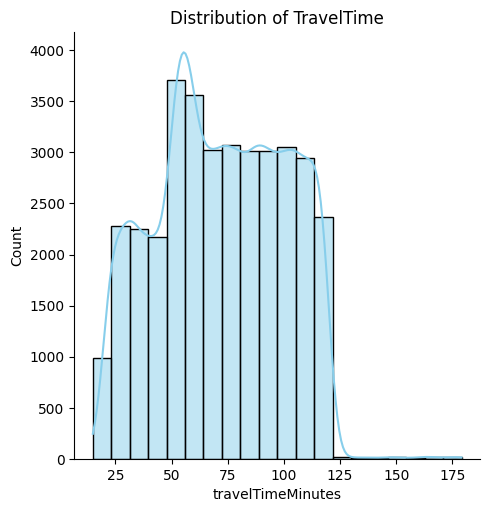

In [39]:
sns.displot(data=df, x='travelTimeMinutes', kde=True, bins=20, color='skyblue')  
plt.title('Distribution of TravelTime')

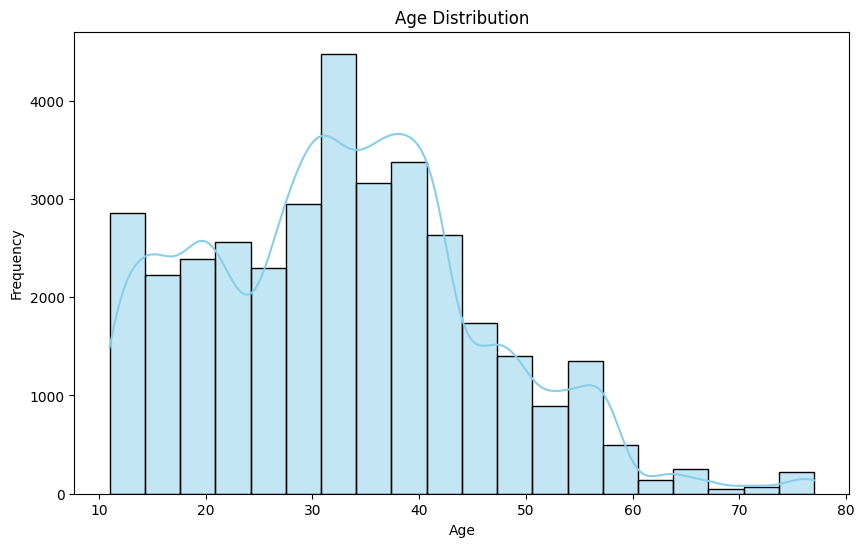

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

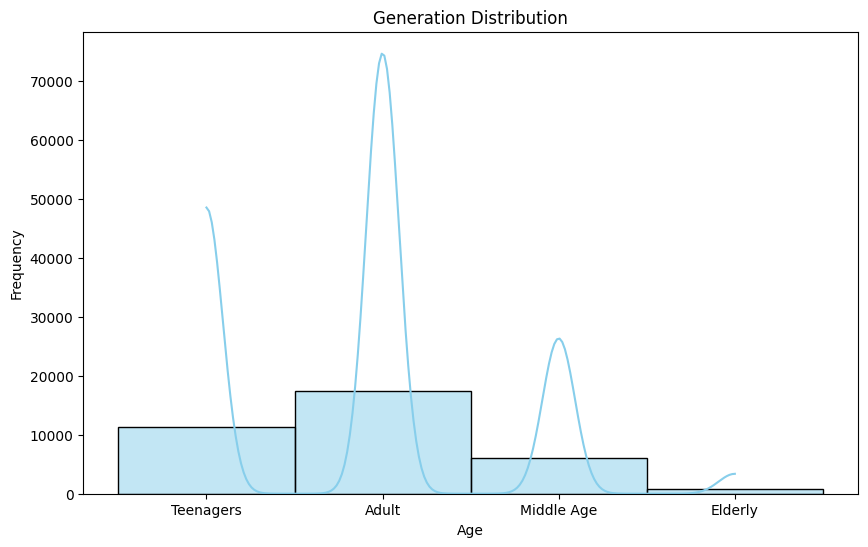

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='generation', kde=True, bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Generation Distribution')
plt.show() 

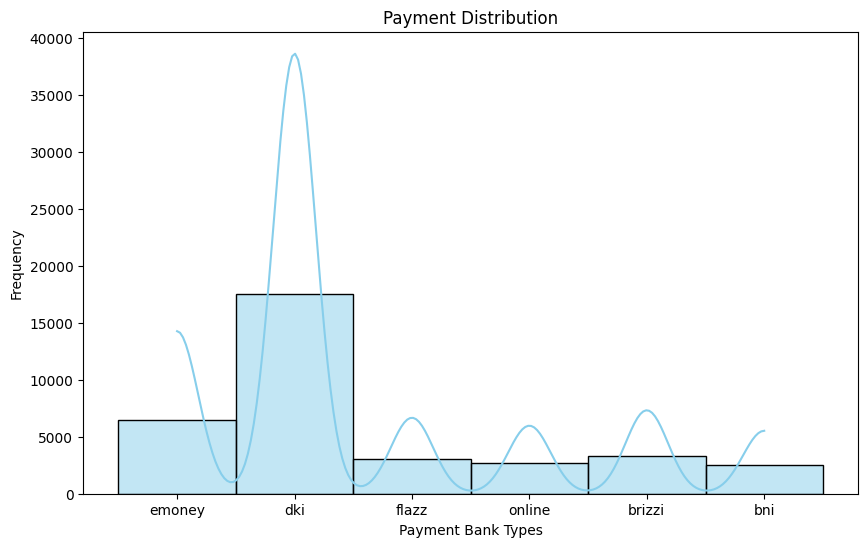

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='payCardBank', kde = True, bins=20, color='skyblue')
plt.xlabel('Payment Bank Types')
plt.ylabel('Frequency')
plt.title('Payment Distribution')
plt.show() 

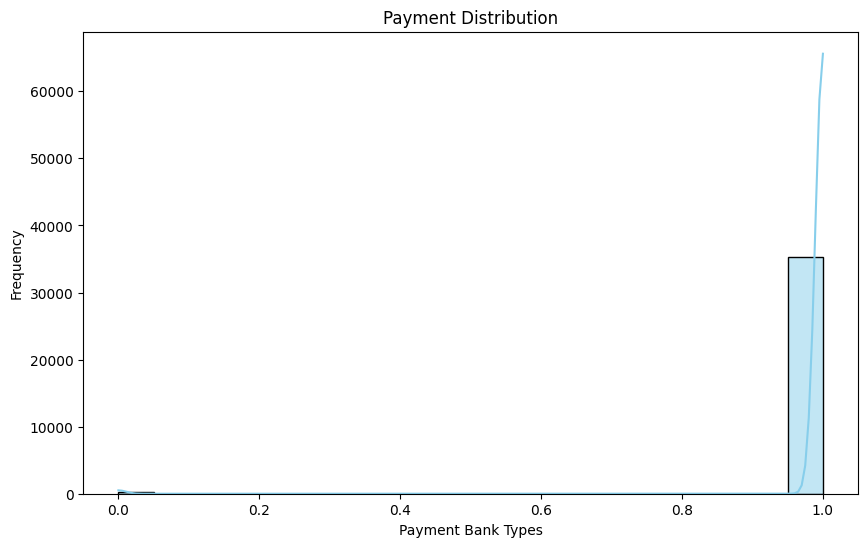

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='isRecurring', kde = True, bins=20, color='skyblue')
plt.xlabel('Payment Bank Types')
plt.ylabel('Frequency')
plt.title('Payment Distribution')
plt.show() 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\2650790269.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[(data['direction'] == direction) & (df['service'] == service)]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\2650790269.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[(data['direction'] == direction) & (df['service'] == service)]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\2650790269.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[(data['direction'] == direction) & (df['service'] == service)]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\2650790269.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = df[(data['direction'] == direction) & (df['service'] == service)]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\2650790269.py:10: UserWarning: Boolean Series key will be reindexed to 

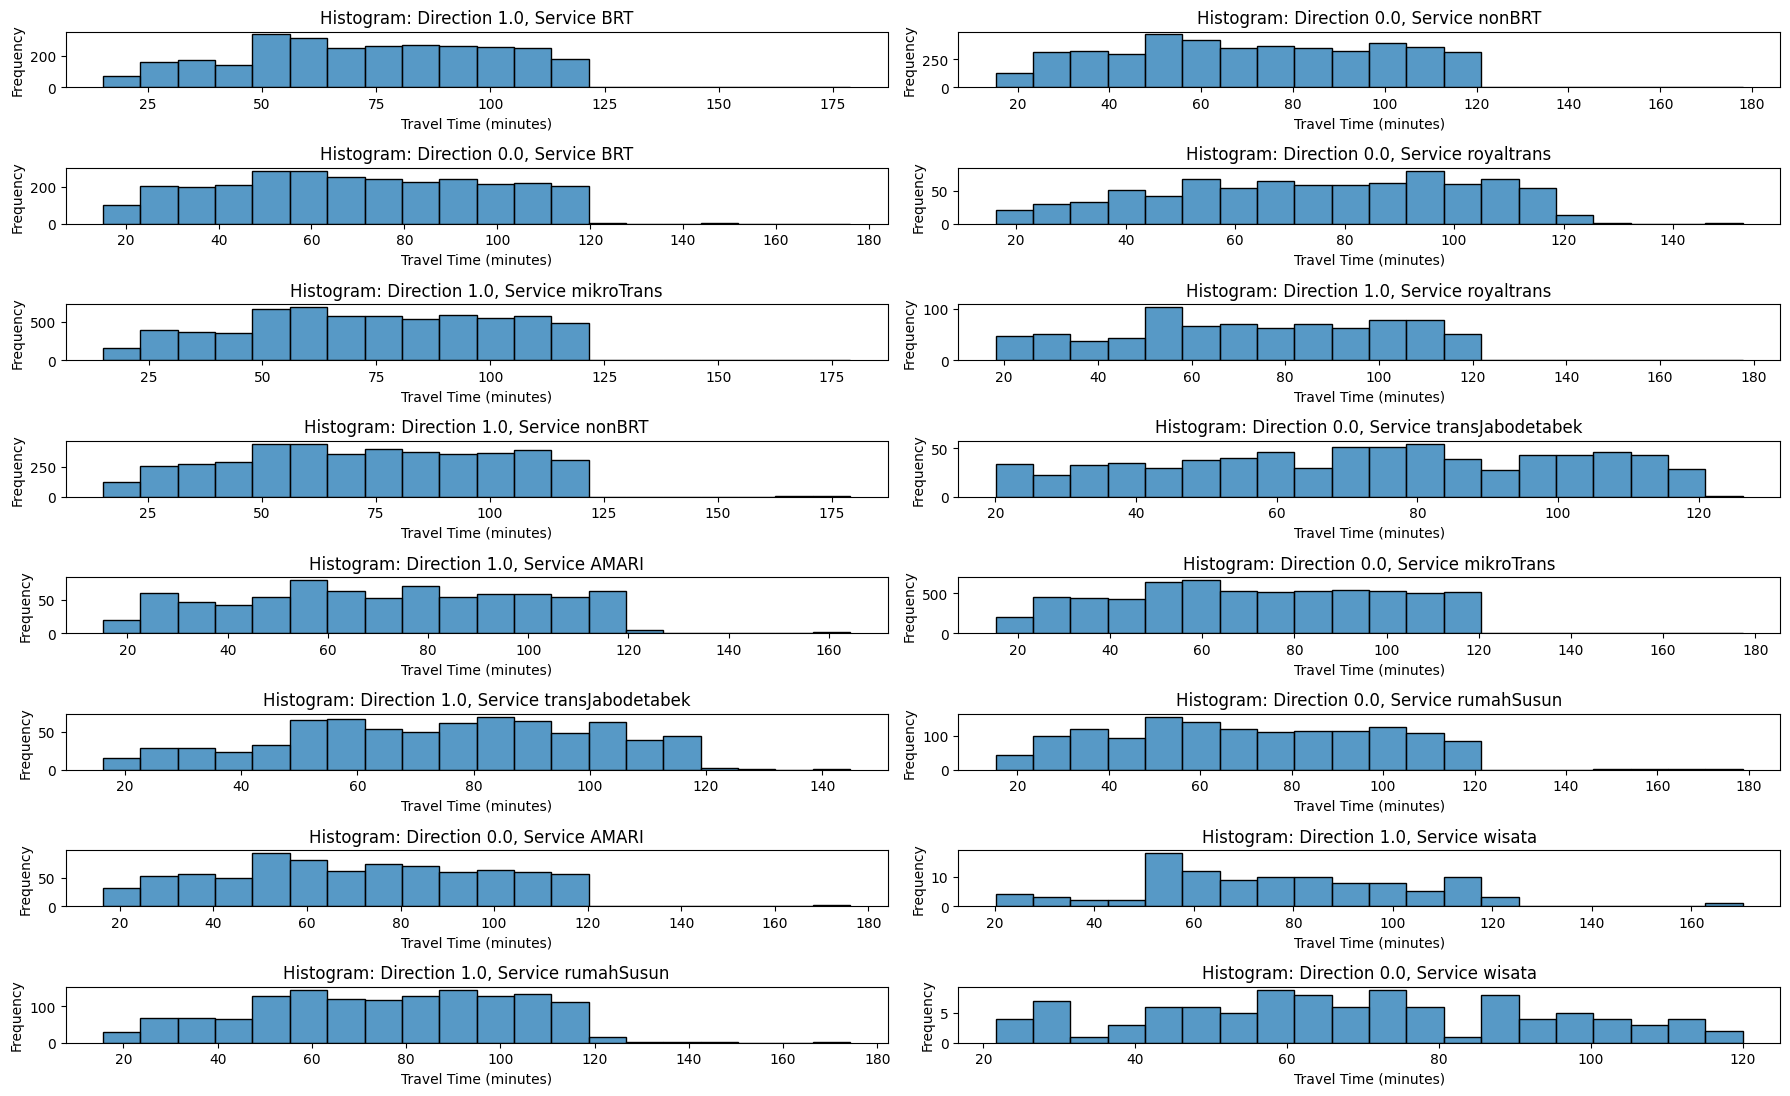

In [44]:
# Extract unique combinations of direction and service type
unique_combinations = df[['direction', 'service']].drop_duplicates()

# Initialize a figure for the plots
plt.figure(figsize=(18, 12))

# Plot histograms
for i, (direction, service) in enumerate(unique_combinations.values):
    # Filter data for the specific combination
    subset = df[(data['direction'] == direction) & (df['service'] == service)]
    
    # Plot histogram
    plt.subplot(len(unique_combinations) // 2 + 1, 2, i + 1)
    sns.histplot(subset['travelTimeMinutes'], kde=False, bins=20)
    plt.title(f'Histogram: Direction {direction}, Service {service}')
    plt.xlabel('Travel Time (minutes)')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


It becomes apparent that the distribution of the data is not normal in majority. Hence, in displaying the data we will use the median of the data

# Questions

### 1. How can we decrease inefficiency in operations?

In this section, the main focus is to identify at what aspects of the busines is leaking money. In order to tamp down on operating costs. 

In [45]:
# Group by 'tapInStopsName', 'startDay', and 'startHour' and count 'payCardID'
df_groupedStopsCount = df.groupby(['tapInStopsName']).agg({'payCardID': 'count'}).reset_index()

# Merge the latitude and longitude information back to the grouped DataFrame
df_groupedStopsCount = df_groupedStopsCount.merge(
    df[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates(),
    on=['tapInStopsName']
)

# Get the bottom 10 stops
bottom_10_stops = df_groupedStopsCount.nsmallest(10, 'payCardID')


# Create a base map centered on Jakarta (approximate coordinates)
m = folium.Map(location=[-6.2088, 106.8456], zoom_start=12)

# Add markers to the map
for _, row in bottom_10_stops.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        popup=f"{row['tapInStopsName']}: {row['payCardID']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m.save('bottom_10_stops_map.html')
m


The map above illustrates the geolocation of various stops along with the respective customer counts at each stop. From this visualization, we can observe the distribution of passenger traffic across different stops. The markers on the map represent stops where passengers tap in, with the accompanying popup displaying the stop name and the number of customers utilizing that stop.Upon analyzing the map, it becomes apparent that there are multiple stops where the number of passengers is relatively low. These underutilized stops might waste valuable resources in maintaining them.

#### Measuring the travel times in the corridors

In [46]:
print(f'The median travel time in all corridors is: {df.travelTimeMinutes.median().round(2)}')

The median travel time in all corridors is: 71.92


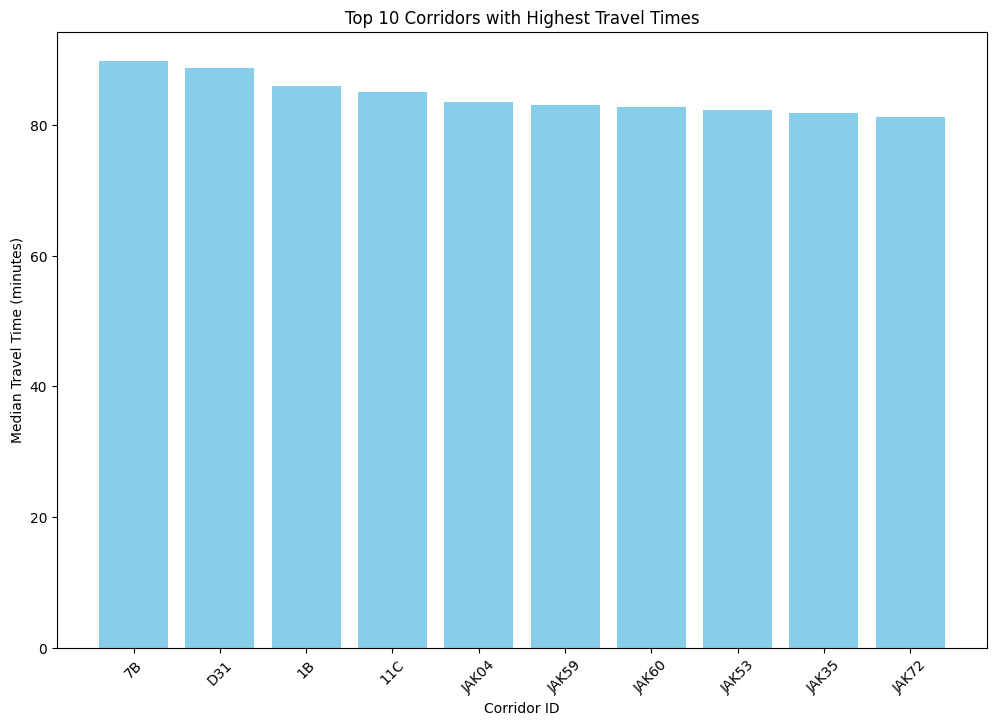

In [47]:
#getting the top travel times by median
toptimes = df.groupby(by='corridorID')['travelTimeMinutes'].agg(func='median').sort_values(ascending=False).reset_index().head(10)

#rounding values
toptimes = round(toptimes,2)
toptimes

# Visualize the top 10 corridors with the highest median travel times
plt.figure(figsize=(12, 8))
plt.bar(toptimes['corridorID'], toptimes['travelTimeMinutes'], color='skyblue')
plt.xlabel('Corridor ID')
plt.ylabel('Median Travel Time (minutes)')
plt.title('Top 10 Corridors with Highest Travel Times')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()


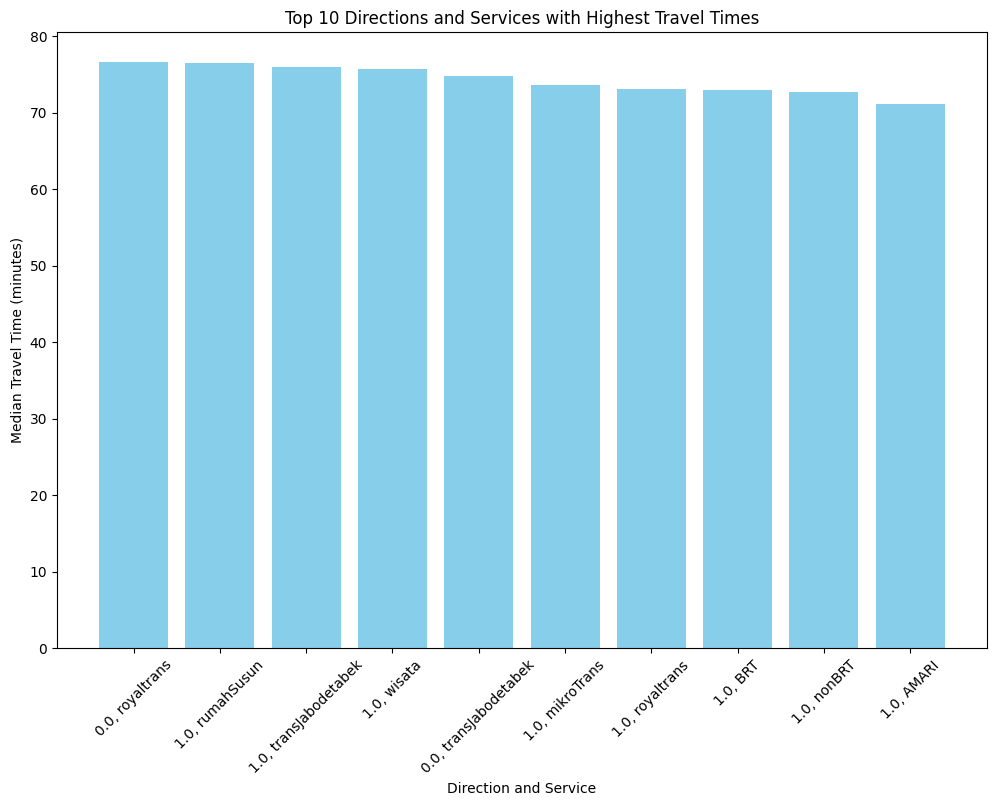

In [48]:
#obtaining the top 10 times of travel time by direction and service
toptimes = df.groupby(by=['direction','service'])['travelTimeMinutes'].agg(func='median').sort_values(ascending=False).reset_index().head(10)

#rounding values
toptimes = round(toptimes,2)

toptimes['travelTimeMinutes'] = toptimes['travelTimeMinutes'].round(2)

# Visualize the top 10 services with the highest median travel times
plt.figure(figsize=(12, 8))
plt.bar(toptimes.apply(lambda x: f"{x['direction']}, {x['service']}", axis=1), toptimes['travelTimeMinutes'], color='skyblue')
plt.xlabel('Direction and Service')
plt.ylabel('Median Travel Time (minutes)')
plt.title('Top 10 Directions and Services with Highest Travel Times')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

With a median travel time of 71.92 minutes, Transjakarta's travel time is quite substantial, indicating the significant duration passengers spend commuting within the city. Analyzing the corridors individually reveals that the 7B corridor stands out with the highest travel time, suggesting potential congestion or longer distances covered in this specific route. Additionally, examining the directional services, it becomes evident that the outgoing service of Royaltrans experiences the longest travel times, which could be attributed to factors such as traffic patterns, route complexity, or peak travel hours. These insights highlight areas where operational efficiencies could be sought to improve overall travel times for passengers.

### 2. What are the demographics of our customers?



In this section we will profile our customers based on their traits. Mainly, age, how frequent they use Transjakarta, and their preferred location

In [49]:
print(f'The median age of the customers is {df.age.median()}')

The median age of the customers is 33.0


##### The median age of customers is 33

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\3606883251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Agecorr = df.groupby(by='generation')[['service']].agg(func='count').reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\3606883251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Agecorr.generation.replace({
C:\U

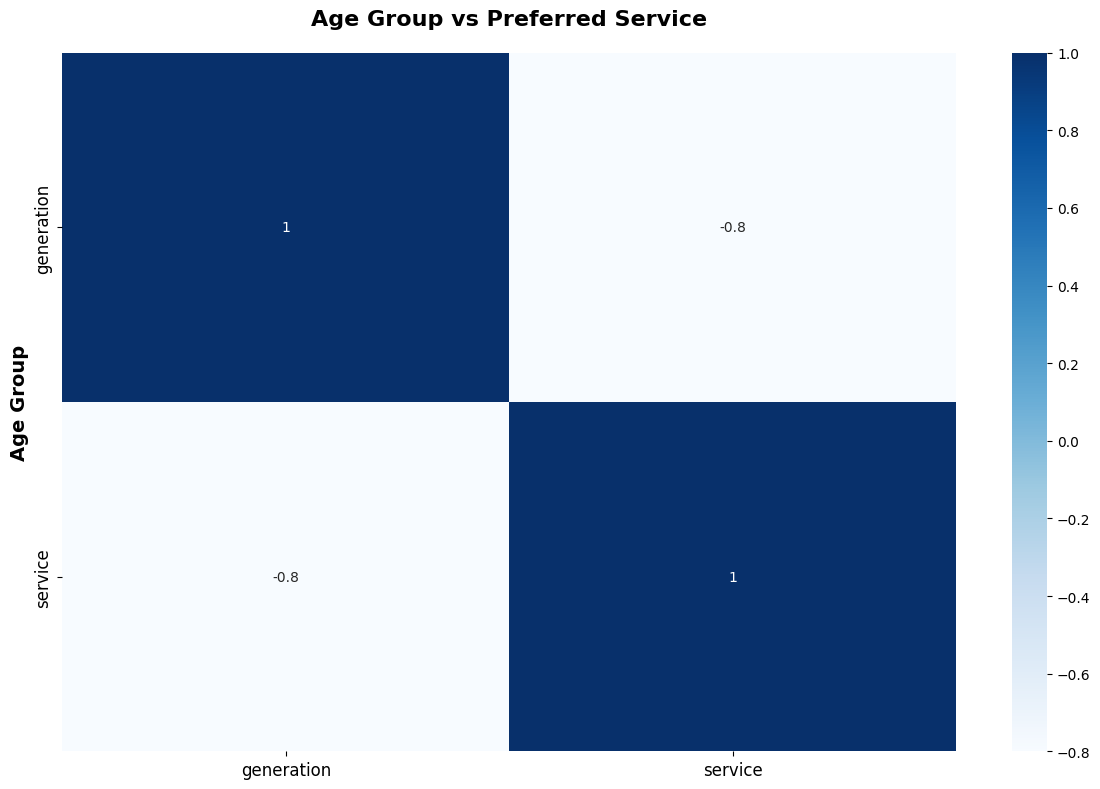

In [50]:
Agecorr = df.groupby(by='generation')[['service']].agg(func='count').reset_index()
Agecorr.generation.replace({
    "Teenagers": 1,
    "Adult" : 2,
    "Middle Age" : 3,
    "Elderly" : 4
},inplace=True)
Agecorr
corrAge = Agecorr.corr(method='spearman') 

plt.figure(figsize=(12, 8))
sns.heatmap(corrAge, cmap='Blues', annot=True)
plt.title('Age Group vs Preferred Service', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Age Group', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

There is no correlation with the types of service preferred by the age group.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\1386559326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_passenger_median = df.groupby(['startHour', 'generation'])['travelTimeMinutes'].median().unstack(fill_value=0)


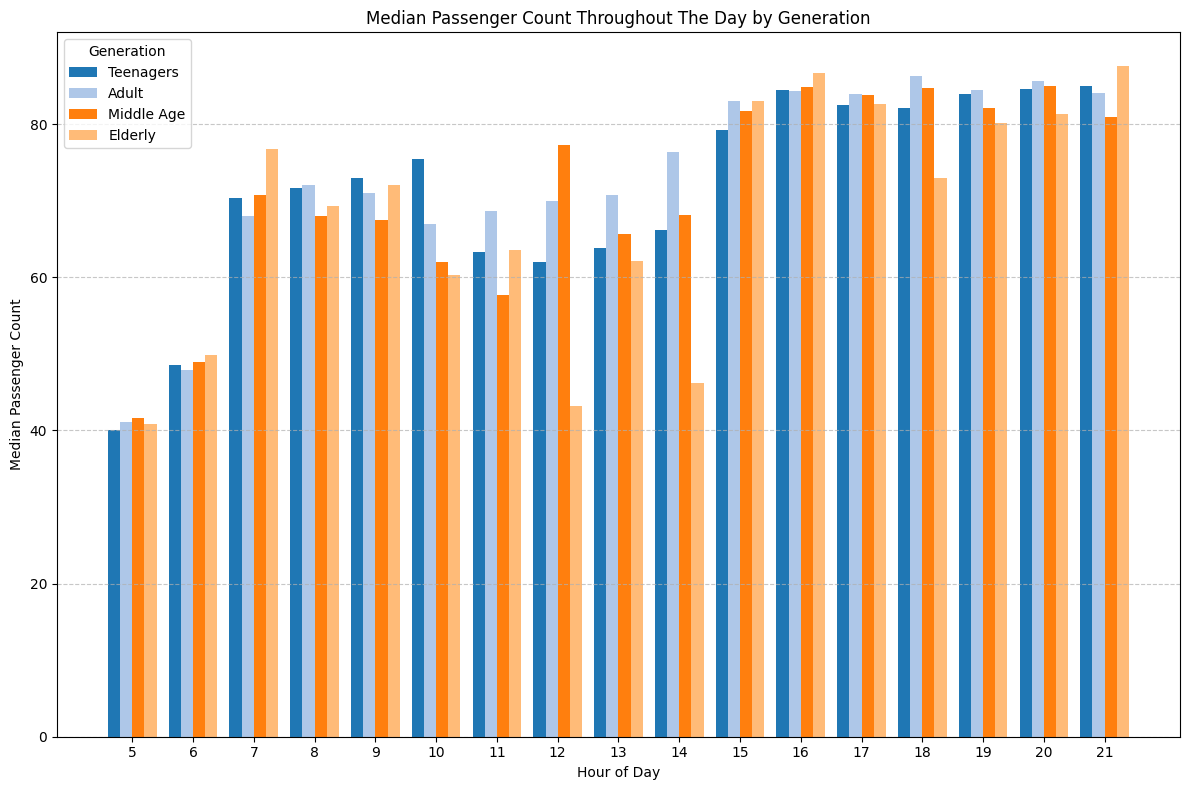

In [51]:
# Calculate median of passengers for each combination of generation and hour
hourly_passenger_median = df.groupby(['startHour', 'generation'])['travelTimeMinutes'].median().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each generation with different colors
colors = plt.cm.tab20.colors  # You can choose different color maps
bar_width = 0.2  # Width of the bars

for i, generation in enumerate(hourly_passenger_median.columns):
    plt.bar(hourly_passenger_median.index + i * bar_width, hourly_passenger_median[generation], width=bar_width, label=generation, color=colors[i])

# Adjust x-ticks to be in the center of grouped bars
plt.xticks(hourly_passenger_median.index + bar_width * (len(hourly_passenger_median.columns) - 1) / 2, hourly_passenger_median.index)

plt.title('Median Passenger Count Throughout The Day by Generation')
plt.xlabel('Hour of Day')
plt.ylabel('Median Passenger Count')
plt.legend(title='Generation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The usage time for all generations generally stay the same. However, the elderly taper of during midday.

### 3. At what time and place can we maximize our efforts?

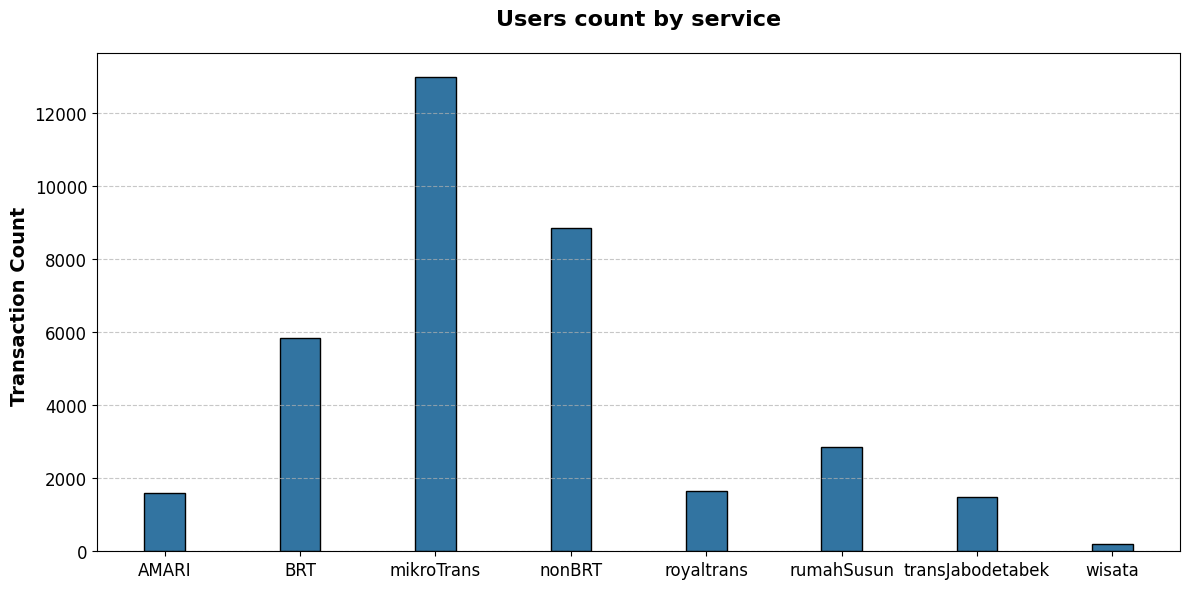

In [52]:
# Grouping the DataFrame by 'service' and counting 'payCardID'
df_groupedStopsCount1 = df.groupby('service').agg({'payCardID':'count'})
df_groupedStopsCount1 = df_groupedStopsCount1.reset_index()

# Creating the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='service', y='payCardID', data=df_groupedStopsCount1, 
            edgecolor='black', capsize=0.2, width=0.3)
plt.title('Users count by service', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Transaction Count ', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Customers tend to prefer using BRT, MikroTrans, and nonBRT services

## Calculating Time and Place

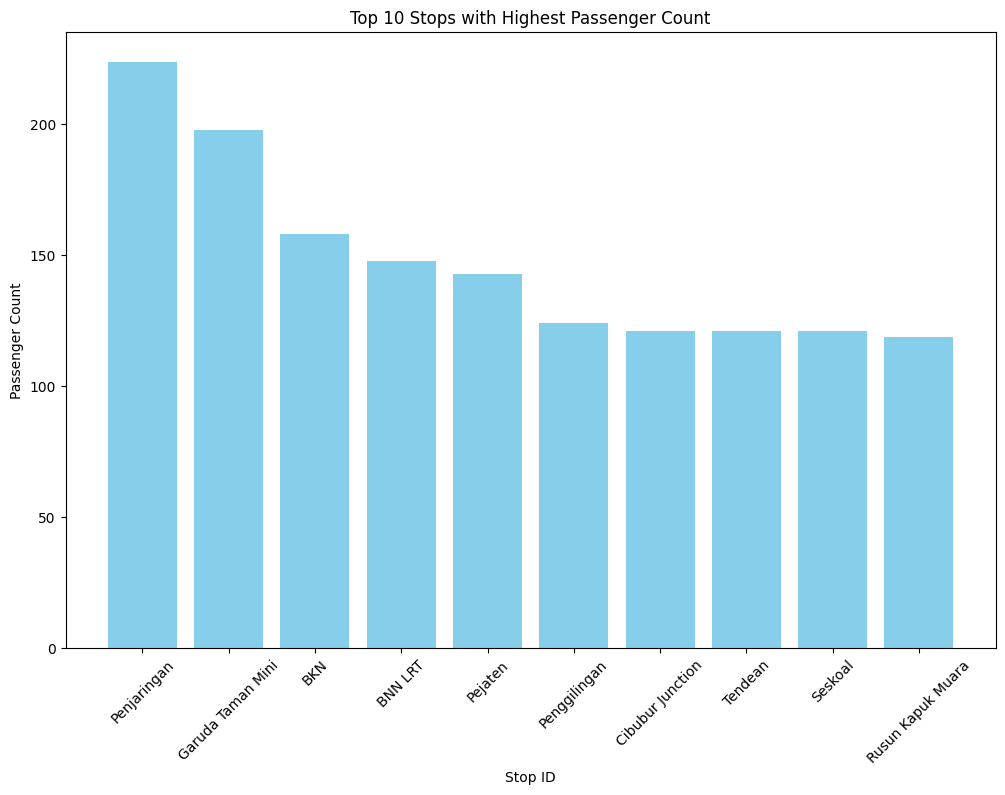

In [53]:
# Group by 'tapInStops' and count the number of 'transID' for each stop
toptimes = df.groupby('tapInStopsName')['transID'].count().sort_values(ascending=False).reset_index().head(10)

# Round the passenger counts for better presentation (if necessary)
# Note: Counting usually doesn't require rounding, so this step might be unnecessary
# toptimes['transID'] = toptimes['transID'].round(2)

# Rename columns for clarity in the plot
toptimes.rename(columns={'tapInStopsName': 'Stop ID', 'transID': 'Passenger Count'}, inplace=True)

# Visualize the top 10 stops with the highest passenger count
plt.figure(figsize=(12, 8))
plt.bar(toptimes['Stop ID'], toptimes['Passenger Count'], color='skyblue')
plt.xlabel('Stop ID')
plt.ylabel('Passenger Count')
plt.title('Top 10 Stops with Highest Passenger Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()


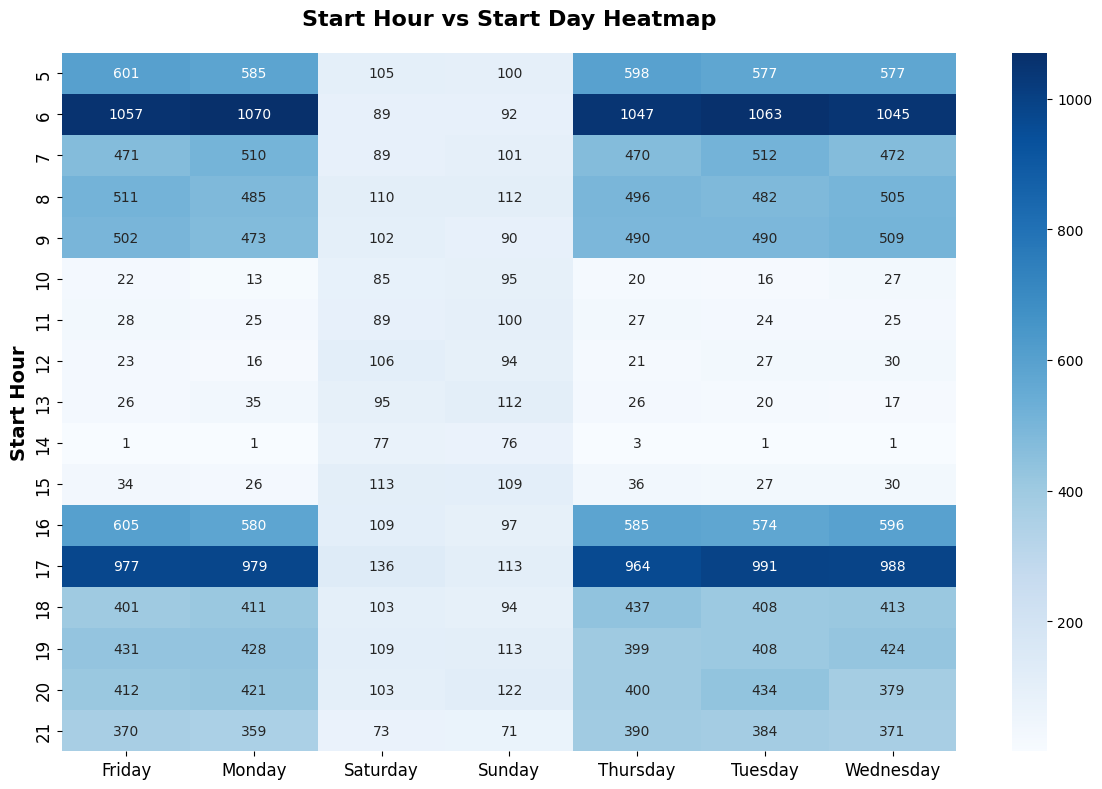

In [54]:
startDay = pd.crosstab(index=df['startHour'], columns=df['startDay'])

plt.figure(figsize=(12, 8))
sns.heatmap(startDay, cmap='Blues', annot=True, fmt='d')
plt.title('Start Hour vs Start Day Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Start Hour', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The graphs above indicate optimal opportunities for maximizing customer acquisition efforts. Specifically, targeting the top 10 stations with the highest passenger traffic can be highly effective. Additionally, focusing on peak travel times, such as the morning rush from 5 to 9 AM and the evening peak from 4 to 9 PM, can further enhance the impact of these efforts. Concentrating on these high-traffic stations during these busy hours will likely yield the greatest increase in customer engagement and acquisition.

### 4. Does bank payment influence recurring purchase?

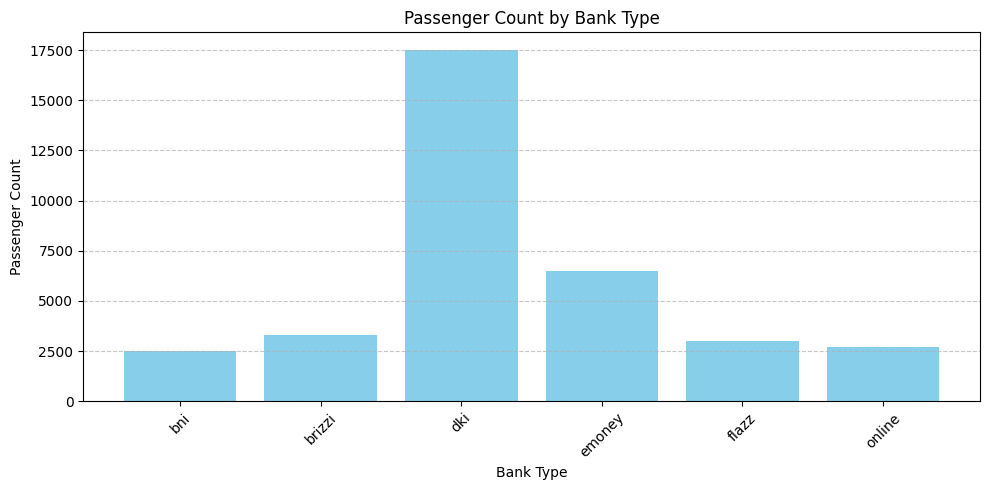

In [55]:
# Group by bank payment type and count the number of payCardID
payCardBank_grouped = df.groupby('payCardBank').agg({'payCardID': 'count'})
payCardBank_grouped = payCardBank_grouped.reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(payCardBank_grouped['payCardBank'], payCardBank_grouped['payCardID'], color='skyblue')
plt.title('Passenger Count by Bank Type')
plt.xlabel('Bank Type')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The preferred method of payment for customers is bank DKI

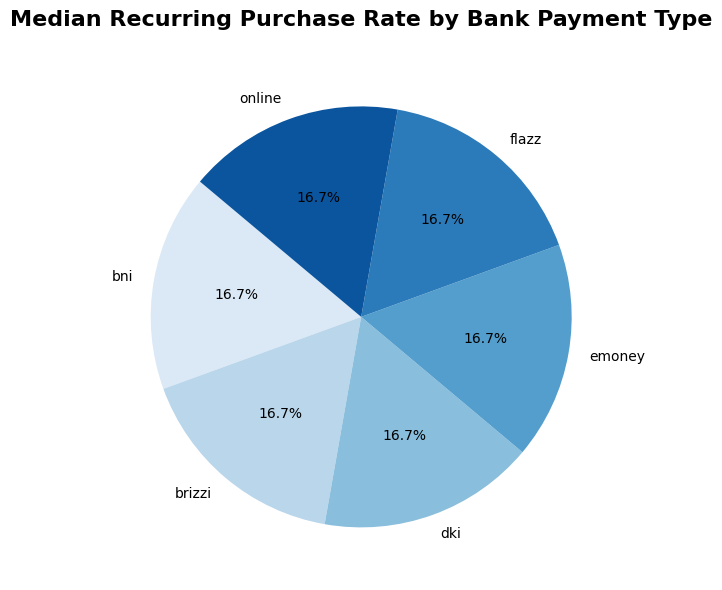

In [56]:
# Group by bank payment type and calculate the median of recurring purchases
recurring_purchase_by_bank = df.groupby('payCardBank')['isRecurring'].median().reset_index()
recurring_purchase_by_bank.columns = ['Bank', 'RecurringPurchaseRate']

# Plotting the pie chart
plt.figure(figsize=(12, 6))
plt.pie(recurring_purchase_by_bank['RecurringPurchaseRate'], 
        labels=recurring_purchase_by_bank['Bank'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Blues", len(recurring_purchase_by_bank)),
        textprops={'color':'black'})  # Set text color to black for readability
plt.title('Median Recurring Purchase Rate by Bank Payment Type', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\1569373893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bankCorr.payCardBank.replace({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20544\1569373893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bankCorr.payCardBank.replace({


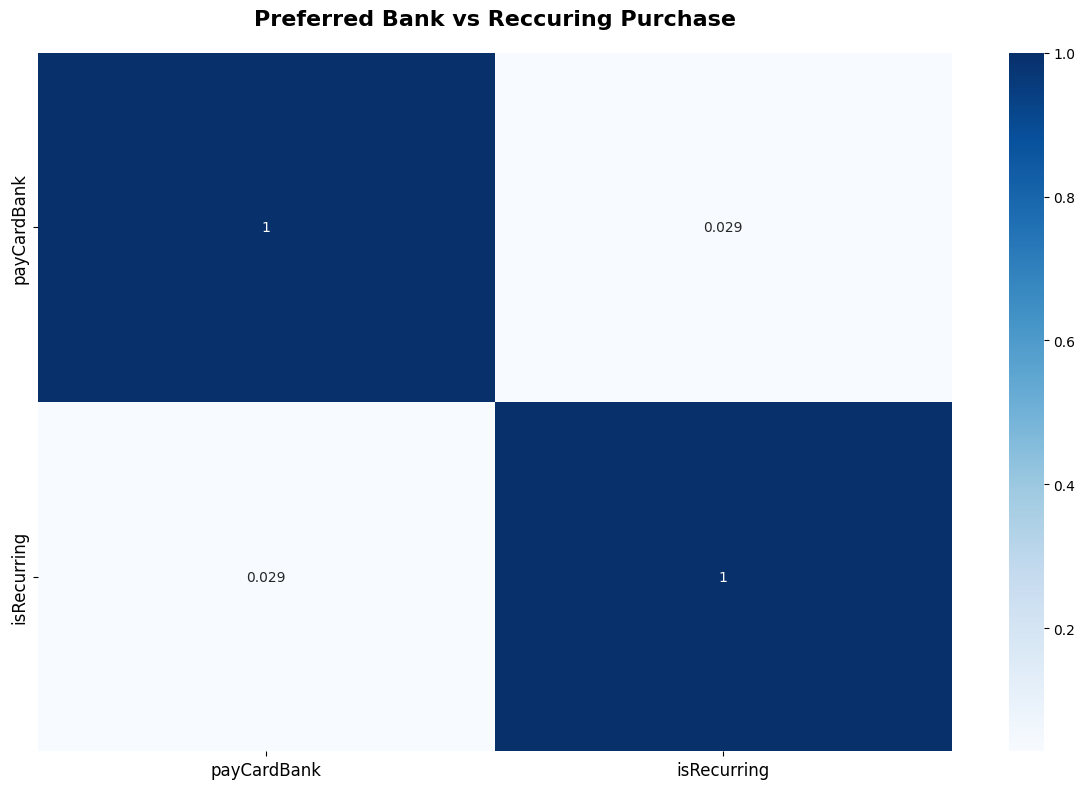

In [57]:
bankCorr = df.groupby(by='payCardBank')[['isRecurring']].agg(func='count').reset_index()
bankCorr.payCardBank.replace({
    "bni": 1,
    "brizzi" : 2,
    "dki" : 3,
    "emoney" : 4,
    "flazz" : 5,
    "online" : 6
},inplace=True)
bankCorr
bankCorr = bankCorr.corr(method='spearman') 

plt.figure(figsize=(12, 8))
sns.heatmap(bankCorr, cmap='Blues', annot=True)
plt.title('Preferred Bank vs Reccuring Purchase', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Regarding recurring purchases, it has been observed that customers who make purchases using a specific type of bank tend to continue using the same bank for subsequent transactions. However, analysis indicates that there is no significant correlation between the type of payment bank used and the likelihood of recurring purchases. This suggests that while customers may show loyalty to their chosen bank, the type of bank does not influence their overall purchasing frequency or behavior.

<a id="numerical"></a>
# <b>Section 5 |</span> Conclusion & Recommendation</span></b>

____

### Conclusion

As per the analysis we can infer some conclusions regarding various aspects of the business. Here, I will summarize it in various points.

#### Operational
- There are a number of stations that is only accessed by 1 person each month. This becomes concerning because throughout the year, it will be a liability. 
- A median travel time of 71.92 minutes between stops in all corridors. With the outgoing royaltrans service being the highest. 

#### Customer Demographic
- The median customer age is 33 
- Customer base largely comprised of adults and teenagers between the age of 25 and 30 years old.

#### Customer acquisition focus
The marketing focus should be BRT and nonBRT services, although mikrotrans has the highest customers it does not produce any revenue, where customers tapping in are plenty in number. 

#### Payment types
The analysis show that bank payments do not influence recurring purchases. This is likely due to the fixed price that we charge to the customers. 

### Actionable Recommendations

Based on the conclusions drawn from the analysis, here are detailed actionable recommendations to improve the business's operational efficiency, customer acquisition, and retention:

#### Improve Efficiency of Operations

1. **Optimize Station Access**:
   - **Analysis**: Identify stations accessed by only one person each month and investigate the underlying reasons. These stations could represent inefficiencies or missed opportunities.
   - **Action**: Evaluate the necessity of these stations. Consider closing underused stations or consolidating them with nearby ones to reduce operational costs and improve resource allocation.

2. **Enhance Route Planning**:
   - **Analysis**: With a median travel time of 71.92 minutes, there's a need to optimize routes to reduce travel time, especially for the royaltrans service.
   - **Action**: Implement advanced route optimization algorithms to find the most efficient paths and reduce travel times. This could involve real-time data analytics to adjust routes dynamically based on traffic conditions.

3. **Monitor and Maintain Fleet**:
   - **Analysis**: Ensuring that the fleet is in good condition will help in maintaining service reliability and efficiency.
   - **Action**: Implement a preventive maintenance schedule and use IoT devices to monitor the health of vehicles in real-time to prevent breakdowns and reduce downtime.

#### Give Incentive to New Customers

1. **Targeted Marketing Campaigns**:
   - **Analysis**: Focus marketing efforts on BRT and nonBRT services which show potential for revenue growth.
   - **Action**: Design and launch targeted marketing campaigns aimed at young adults and teenagers, emphasizing the benefits and convenience of using BRT and nonBRT services. Utilize social media, influencer partnerships, and promotions to attract this demographic.

2. **Referral Programs**:
   - **Analysis**: Word-of-mouth and social proof can significantly influence new customer acquisition.
   - **Action**: Create a referral program where existing customers are incentivized to bring in new customers. Offer rewards such as discounts, free rides, or loyalty points for successful referrals.

3. **Promotional Offers**:
   - **Analysis**: Initial discounts can attract new users to try the service.
   - **Action**: Provide introductory offers such as discounted fares for the first month or free rides for the first few trips to encourage new customers to try the services.

#### Reward Existing Customers

1. **Loyalty Programs**:
   - **Analysis**: Retaining existing customers is often more cost-effective than acquiring new ones.
   - **Action**: Develop a loyalty program where customers earn points for every trip they take, which can be redeemed for free rides, merchandise, or discounts on future trips. This will encourage repeat usage and build customer loyalty.

2. **Personalized Rewards**:
   - **Analysis**: Personalized incentives can make customers feel valued and appreciated.
   - **Action**: Use customer data to tailor rewards to individual preferences and behaviors. For example, offer special discounts on frequently traveled routes or during the customer’s preferred travel times.

3. **Customer Feedback Mechanism**:
   - **Analysis**: Understanding customer needs and preferences can help improve service quality.
   - **Action**: Implement a robust feedback system where customers can easily share their experiences and suggestions. Regularly analyze this feedback to make informed improvements to the services offered.

By focusing on these actionable recommendations, the business can enhance operational efficiency, attract new customers, and retain existing ones, ultimately driving growth and profitability.